In [1]:
from pipelines import Pipeline
from db import FirestoreDB
import json
import matplotlib.pyplot as plt
import numpy as np

from firebase_admin import initialize_app
from firebase_admin.credentials import Certificate
from security import Credentials
from services import RLService, TSService, SentimentService, EngineService, ServiceProvider
import torch

Trying to open credentials: [d:\Assignments\AI project\Test_server\server/keys.json]


d:\Assignments\AI project\Test_server\server\.server\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Trying to open credentials: [d:\Assignments\AI project\Test_server\server/keys.json]


In [2]:
torch.set_default_device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
app = initialize_app(Certificate(Credentials("firebase").load()))
db = FirestoreDB(app)

Trying to open credentials: [d:\Assignments\AI project\Test_server\server/keys.json]


In [4]:
service_provider = ServiceProvider()

service_provider.add(RLService())
service_provider.add(TSService())
service_provider.add(SentimentService())

engine_service = EngineService(service_provider=service_provider)

Service added: [<services.rl_service.RLService object at 0x000002679FE3D750>]
Service added: [<services.ts_service.TSService object at 0x000002679FE3D7D0>]
Service added: [<services.sentiment_service.SentimentService object at 0x000002679E87F850>]


In [5]:
context = {
    "db": db,
    "symbol": "BTC-USDT",
    "ohlcv_limit": 2,
    "sentiment_limit": 2,
}

In [6]:
engine = engine_service.rl_train_engine(context=context)

In [7]:
context = engine.run_sequential()

Starting context 
 {'db': <db.firestore.FirestoreDB object at 0x000002679FE259D0>, 'symbol': 'BTC-USDT', 'sentiment_limit': 2, 'ohlcv_limit': 2}
[<services.sentiment_service.SentimentService object at 0x000002679E87F850>] Running get latest function
Pipeline(name=sentiment_get_latest) action finished
[<services.ts_service.TSService object at 0x000002679FE3D7D0>] Running get_latest function symbol=BTC-USDT
Pipeline(name=ohlcv_get_latest) action finished
Pipeline(name=rl_preprocess) action finished
Timestamp converted to datetime.
Timestamp set as index.
NaN values dropped.
Data split.
Train data saved.
Test data saved.


d:\Assignments\AI project\Test_server\server\rl\get_data.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], infer_datetime_format=True)
  0%|          | 0/50 [00:00<?, ?it/s]


===== Episode 1 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 0.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 0.0
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.0003329144010492022
New cash_balance: 901.88


  2%|▏         | 1/50 [00:01<00:54,  1.11s/it]


===== Episode 2 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 0.029
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.000702236063675165
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010624
BTC purchased: 0.001334356159647341
New cash_balance: 833.62
Current cash_balance: 833.62
Current BTC amount: 0.0023968
BTC purchased: 0.0012005279514733967
New cash_balance: 750.26
Hold: Price is 69343.9
Current cash_balance: 750.26
Current BTC amount: 0.0035973
BTC purchased: 0.0010799028427491905
New cash_balance: 675.24
Hold: Price is 69559.6
Hold: Price is 69686.3
Hold: Price is 69706.0
Hold: Price is 69651.6
Current cash_balance: 675.24
Current BTC amount: 0.0046772
BTC purchased: 0.0009703426913492962
New cash_balance: 607.71
Current cash_balance: 607.71
Current BTC amount: 0.005647

  4%|▍         | 2/50 [00:03<01:33,  1.94s/it]


===== Episode 3 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 0.005
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.000999416556820883
New cash_balance: 855.62
Hold: Price is 69458.0
Current cash_balance: 855.62
Current BTC amount: 0.00208
BTC purchased: 0.0012298869905446937
New cash_balance: 770.06
Current cash_balance: 770.06
Current BTC amount: 0.0033099
BTC purchased: 0.0005534213034098048
New cash_balance: 731.56
Current cash_balance: 731.56
Current BTC amount: 0.0038634
BTC purchased: 0.0005254821077628563
New cash_balance: 694.98
Current cash_balance: 694.98
Current BTC amount: 0.0043888
BTC purchased: 0.0004984368074591091
New cash_balance: 660.23
Current cash_balance: 660.23
Current BTC amount: 0.0048873
BTC purchased: 0.0009487814402284037
New cash_balance: 594.21
Current cash_balance: 594.21
C

  6%|▌         | 3/50 [00:06<01:44,  2.22s/it]

Current cash_balance: 446.45
Current BTC amount: 0.0079633
BTC purchased: 0.00048130804684197855
New cash_balance: 412.96

===== Episode 4 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 0.001
Hold: Price is 69434.3
Hold: Price is 69438.2
Hold: Price is 69471.0
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.0006670916821960802
New cash_balance: 878.75
Current cash_balance: 878.75
Current BTC amount: 0.0017477
BTC purchased: 0.0006338916148131905
New cash_balance: 834.81
Current cash_balance: 834.81
Current BTC amount: 0.0023816
BTC purchased: 0.0009016980573673576
New cash_balance: 772.2
Current cash_balance: 772.2
Current BTC amount: 0.0032833
BTC purchased: 0.0005551405120193932
New cash_balance: 733.59
Current cash_balance: 733.59
Current BTC amount: 0.0038384
BTC purchased: 0.0005273281378940272
New cas

  8%|▊         | 4/50 [00:08<01:46,  2.30s/it]

Current cash_balance: 395.59
Current BTC amount: 0.0086982
BTC purchased: 0.00028436015480840497
New cash_balance: 375.81
Hold: Price is 69500.1

===== Episode 5 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 0.0
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.000702236063675165
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010624
BTC purchased: 0.0010007671197355059
New cash_balance: 856.78
Current cash_balance: 856.78
Current BTC amount: 0.0020632
BTC purchased: 0.000925143162054767
New cash_balance: 792.52
Current cash_balance: 792.52
Current BTC amount: 0.0029884
BTC purchased: 0.0008560704801310909
New cash_balance: 733.08
Current cash_balance: 733.08
Current BTC amount: 0.0038444
BTC purchased: 0.0007929192587477087
New cash_balance: 678.1
Current cash_balance: 678.1
Cu

 10%|█         | 5/50 [00:11<01:55,  2.56s/it]


===== Episode 6 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 791.217
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0010533540955127475
New cash_balance: 901.88
Current cash_balance: 901.88
Current BTC amount: 0.0014136
BTC purchased: 0.0009750801146905043
New cash_balance: 834.23
Current cash_balance: 834.23
Current BTC amount: 0.0023886
BTC purchased: 0.000901464387032357
New cash_balance: 771.67
Current cash_balance: 771.67
Current BTC amount: 0.0032901
BTC purchased: 0.0008330336058384311
New cash_balance: 713.79
Current cash_balance: 713.79
Current BTC amount: 0.0041231
BTC purchased: 0.0007709811098915001
New cash_balance: 660.26
Current cash_balance: 660.26
Current BTC amount: 0.0048941
BTC purchased: 0.0007130640763114961
New cash_balance: 610.74
Current cash_balance: 610.74
Current BTC amount:

 12%|█▏        | 6/50 [00:15<02:08,  2.93s/it]

Current cash_balance: 437.42
Current BTC amount: 0.0080977
BTC purchased: 0.00031473132165751107
New cash_balance: 415.55
Current cash_balance: 415.55
Current BTC amount: 0.0084124
BTC purchased: 0.0002989568973003444
New cash_balance: 394.77
Current cash_balance: 394.77
Current BTC amount: 0.0087114
BTC purchased: 0.0002838901863556676
New cash_balance: 375.03

===== Episode 7 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 296.349
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0013684600215208343
New cash_balance: 855.0
Current cash_balance: 855.0
Current BTC amount: 0.0020889
BTC purchased: 0.0006165245895965261
New cash_balance: 812.25
Current cash_balance: 812.25
Current BTC amount: 0.0027054
BTC purchased: 0.0005859070685386839
New cash_balance: 771.64
Current cash_balance: 771.64
Current BTC amount: 

 14%|█▍        | 7/50 [00:19<02:20,  3.26s/it]


===== Episode 8 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 179.21
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0010533540955127475
New cash_balance: 901.88
Current cash_balance: 901.88
Current BTC amount: 0.0014136
BTC purchased: 0.001298889741813484
New cash_balance: 811.69
Hold: Price is 69488.9
Hold: Price is 69487.7
Current cash_balance: 811.69
Current BTC amount: 0.0027125
BTC purchased: 0.0008774860867070936
New cash_balance: 750.81
BTC Held: 0.0035899  |  Cash Held: 750.81  |  Portfolio Value: -0.133  |   MSE Loss: 2052.165
Current cash_balance: 750.81
Current BTC amount: 0.0035899
BTC purchased: 0.000811980105443403
New cash_balance: 694.5
Current cash_balance: 694.5
Current BTC amount: 0.0044019
BTC purchased: 0.0007498867527452653
New cash_balance: 642.41
Current cash_balance: 642.41
Curr

 16%|█▌        | 8/50 [00:23<02:24,  3.44s/it]

Current cash_balance: 286.93
Current BTC amount: 0.0102475
BTC purchased: 0.00030970611131136435
New cash_balance: 265.41
Selling: 0.075% of portfolio at BTC price 69491.3
Current cash_balance: 265.41
BTC amount: 0.0105572
Current ask price: 69491.3
----------------
--SOLD: Giving reward to RL Model --
portfolio_diff - 999.6643977151411

Amount BTC sold: 0.0007917922924457853
Selling price: 69491.3
Trading fee: 0.4126700679902835
New BTC amount: 0.0097654
New cash_balance: 320.02
___________________

===== Episode 9 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0014408370687034337
New cash_balance: 900.0
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 434.653
Hold: Price is 69468.1
Hold: Price is 69471.0
Current cash_balance: 900.0
Current BTC amount: 0.0014408
BTC purchased: 0.00032314214807665793
New cash_balance: 877.5
Current cash_balance: 877.5
Current BTC amount: 0.001764
BTC purchased: 0.00031522566924834395
New cas

 18%|█▊        | 9/50 [00:26<02:26,  3.56s/it]

Current cash_balance: 792.46
Current BTC amount: 0.0029859
BTC purchased: 0.0008548370997728243
New cash_balance: 733.03

===== Episode 10 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 1413.572
Hold: Price is 69468.1
Hold: Price is 69471.0
Hold: Price is 69452.1
Hold: Price is 69469.1
Hold: Price is 69430.1
Hold: Price is 69350.1
Hold: Price is 69315.1
Hold: Price is 69349.7
Hold: Price is 69340.3
Hold: Price is 69315.6
Hold: Price is 69356.5
Hold: Price is 69313.9
Hold: Price is 69371.8
Hold: Price is 69341.3
Hold: Price is 69475.0
Hold: Price is 69608.4
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.0009965496041094474
New cash_balance: 855.62
Current cash_balance: 855.62
Current BTC amount: 0.0020772
BTC purchased: 0.0009222707432994683
New cash_balance: 791.45
Current cash_balance: 791.45
Current BTC 

 20%|██        | 10/50 [00:30<02:23,  3.58s/it]


===== Episode 11 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 492.57
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0003421150053802086
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010625
BTC purchased: 0.0003335068829339532
New cash_balance: 903.09
Current cash_balance: 903.09
Current BTC amount: 0.001396
BTC purchased: 0.0003252469711593869
New cash_balance: 880.52
Current cash_balance: 880.52
Current BTC amount: 0.0017213
BTC purchased: 0.00031741713647492935
New cash_balance: 858.5
Current cash_balance: 858.5
Current BTC amount: 0.0020387
BTC purchased: 0.0003094834931130741
New cash_balance: 837.04
Current cash_balance: 837.04
Current BTC amount: 0.0023482
BTC purchased: 0.0003018948507592109
New cash_balance: 816.11
Current cash_balance: 816.11
Current BTC amount: 0

 22%|██▏       | 11/50 [00:34<02:29,  3.83s/it]


===== Episode 12 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 1560.589
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
Hold: Price is 69473.9
Hold: Price is 69471.0
Hold: Price is 69469.1
Hold: Price is 69458.0
Hold: Price is 69430.1
Hold: Price is 69432.6
Current cash_balance: 926.86
Current BTC amount: 0.0010536
BTC purchased: 0.00033380610197937077
New cash_balance: 903.69
Current cash_balance: 903.69
Current BTC amount: 0.0013874
BTC purchased: 0.00032593471358513515
New cash_balance: 881.1
Current cash_balance: 881.1
Current BTC amount: 0.0017133
BTC purchased: 0.0003176277955634181
New cash_balance: 859.07
Current cash_balance: 859.07

 24%|██▍       | 12/50 [00:38<02:27,  3.88s/it]


===== Episode 13 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 265.436
Hold: Price is 69475.0
Hold: Price is 69436.7
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.00033299349996688063
New cash_balance: 901.88
Current cash_balance: 901.88
Current BTC amount: 0.0014136
BTC purchased: 0.0003248080413737467
New cash_balance: 879.33
Current cash_balance: 879.33
Current BTC amount: 0.0017384
BTC purchased: 0.0003163988624685879
New cash_balance: 857.34
Current cash_balance: 857.34
Current BTC amount: 0.0020548
BTC purchased: 0.00030838991056154024
New cash_balance: 835.91
Current cash_balance: 835.91
Current BTC amount: 0.0023632
BTC purchased: 0.00030054092278303284
New cash_balance: 815.01
Current cash_balance: 815.01
Current BTC amount: 0.0026638
BTC purchased: 0.00029303709261595517
New cash_balance: 794.

 26%|██▌       | 13/50 [00:43<02:27,  3.98s/it]


===== Episode 14 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 300.854
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0010533540955127475
New cash_balance: 901.88
BTC Held: 0.0014136  |  Cash Held: 901.88  |  Portfolio Value: 0.006  |   MSE Loss: 744.049
Current cash_balance: 901.88
Current BTC amount: 0.0014136
BTC purchased: 0.0009734102719450612
New cash_balance: 834.23
Current cash_balance: 834.23
Current BTC amount: 0.002387
BTC purchased: 0.0009001752096941271
New cash_balance: 771.67
Current cash_balance: 771.67
Current BTC amount: 0.0032871
BTC purchased: 0.000832398598631127
New cash_balance: 713.79
Current cash_balance: 713.79
Current BTC amount: 0.0041195
BTC purchased: 0.0007695912577855344
New cash_balance: 660.26
Current cash_balance: 660.26
Current BTC amount: 0.0048891
BTC purchased: 0.0

 28%|██▊       | 14/50 [00:46<02:14,  3.74s/it]


===== Episode 15 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 1363.149
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.000702236063675165
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010624
BTC purchased: 0.001000496152477954
New cash_balance: 856.78
Current cash_balance: 856.78
Current BTC amount: 0.0020629
BTC purchased: 0.00030856986191844766
New cash_balance: 835.36
Current cash_balance: 835.36
Current BTC amount: 0.0023715
BTC purchased: 0.0003007572628430749
New cash_balance: 814.48
Current cash_balance: 814.48
Current BTC amount: 0.0026723
BTC purchased: 0.0002931796431573883
New cash_balance: 794.12
Current cash_balance: 794.12
Current BTC amount: 0.0029654
BTC purchased: 0.0002857802007967279
New cash_balance: 774.26
Current cash_balance: 774.26
Current BTC amoun

 30%|███       | 15/50 [00:49<02:01,  3.47s/it]


===== Episode 16 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 1048.966
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0006842300107604172
New cash_balance: 902.5
BTC Held: 0.0014046  |  Cash Held: 902.5  |  Portfolio Value: 0.012  |   MSE Loss: 216.911


 32%|███▏      | 16/50 [00:51<01:49,  3.22s/it]


===== Episode 17 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 110.402
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 134.404


 34%|███▍      | 17/50 [00:54<01:39,  3.01s/it]


===== Episode 18 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 223.917
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0010263450161406259
New cash_balance: 878.75
Current cash_balance: 878.75
Current BTC amount: 0.0017468
BTC purchased: 0.0009491886574790845
New cash_balance: 812.84
Current cash_balance: 812.84
Current BTC amount: 0.002696
BTC purchased: 0.0008782372993063508
New cash_balance: 751.88
Current cash_balance: 751.88
Current BTC amount: 0.0035742
BTC purchased: 0.0008121039306354427
New cash_balance: 695.49
Current cash_balance: 695.49
Current BTC amount: 0.0043863
BTC purchased: 0.0007508101246587747
New cash_balance: 643.33
Current cash_balance: 643.33
Current BTC amount: 0.0051371
BTC purchased: 0.000694557350144403
New cash_balance: 595.08
Current cash_balance: 595.08
Current BTC amount: 

 36%|███▌      | 18/50 [00:56<01:32,  2.90s/it]


===== Episode 19 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 734.103
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.0009956814336090384
New cash_balance: 855.62
Current cash_balance: 855.62
Current BTC amount: 0.0020763
BTC purchased: 0.0009210436611025792
New cash_balance: 791.45
Current cash_balance: 791.45
Current BTC amount: 0.0029974
BTC purchased: 0.0008527560520713018
New cash_balance: 732.09
Current cash_balance: 732.09
Current BTC amount: 0.0038501
BTC purchased: 0.0005252685848163805
New cash_balance: 695.49
Current cash_balance: 695.49
Current BTC amount: 0.0043754
BTC purchased: 0.0004992458678566557
New cash_balance: 660.71
BTC Held: 0.0048746  |  Cash Held: 660.71  |  Portfolio Value: 0.252  |   MSE Loss: 139.184


 38%|███▊      | 19/50 [00:59<01:26,  2.79s/it]


===== Episode 20 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 780.008
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0006842300107604172
New cash_balance: 902.5
Current cash_balance: 902.5
Current BTC amount: 0.0014046
BTC purchased: 0.0006498949366523461
New cash_balance: 857.38
Current cash_balance: 857.38
Current BTC amount: 0.0020545
BTC purchased: 0.0012364101240339817
New cash_balance: 771.64
Current cash_balance: 771.64
Current BTC amount: 0.003291
BTC purchased: 0.0011129922111639983
New cash_balance: 694.47
Current cash_balance: 694.47
Current BTC amount: 0.0044039
BTC purchased: 0.0010016814316292327
New cash_balance: 625.03
Current cash_balance: 625.03
Current BTC amount: 0.0054056
BTC purchased: 0.0009010129480908702
New cash_balance: 562.52
Current cash_balance: 562.52
Current BTC amount: 0

 40%|████      | 20/50 [01:02<01:21,  2.72s/it]


===== Episode 21 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 850.137
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0006842300107604172
New cash_balance: 902.5
Current cash_balance: 902.5
Current BTC amount: 0.0014046
BTC purchased: 0.0006498949366523461
New cash_balance: 857.38
Current cash_balance: 857.38
Current BTC amount: 0.0020545
BTC purchased: 0.0006175674020931925
New cash_balance: 814.51
Current cash_balance: 814.51
Current BTC amount: 0.0026721
BTC purchased: 0.0005864972378316259
New cash_balance: 773.78
Current cash_balance: 773.78
Current BTC amount: 0.0032586
BTC purchased: 0.0005569325614922533
New cash_balance: 735.09
Current cash_balance: 735.09
Current BTC amount: 0.0038155
BTC purchased: 0.0005290638472348174
New cash_balance: 698.34
Current cash_balance: 698.34
Current BTC amount: 

 42%|████▏     | 21/50 [01:05<01:27,  3.02s/it]


===== Episode 22 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 775.076
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0013684600215208343
New cash_balance: 855.0
Current cash_balance: 855.0
Current BTC amount: 0.0020889
BTC purchased: 0.0009235575219709472
New cash_balance: 790.88
Current cash_balance: 790.88
Current BTC amount: 0.0030124
BTC purchased: 0.000854495001152472
New cash_balance: 731.56
Current cash_balance: 731.56
Current BTC amount: 0.0038669
BTC purchased: 0.0007911589619193051
New cash_balance: 676.69
Current cash_balance: 676.69
Current BTC amount: 0.0046581
BTC purchased: 0.0007319254696132696
New cash_balance: 625.94
Current cash_balance: 625.94
Current BTC amount: 0.00539
BTC purchased: 0.000677272313412538
New cash_balance: 578.99
Current cash_balance: 578.99
Current BTC amount: 0.00

 44%|████▍     | 22/50 [01:09<01:33,  3.35s/it]


===== Episode 23 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0014408370687034337
New cash_balance: 900.0
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 1830.246
Current cash_balance: 900.0
Current BTC amount: 0.0014408
BTC purchased: 0.001298418382141842
New cash_balance: 810.0
Current cash_balance: 810.0
Current BTC amount: 0.0027393
BTC purchased: 0.0011679935169149976
New cash_balance: 729.0
BTC Held: 0.0039072  |  Cash Held: 729.0  |  Portfolio Value: -0.033  |   MSE Loss: 1525.893


 46%|████▌     | 23/50 [01:13<01:35,  3.53s/it]


===== Episode 24 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 103.657
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0013684600215208343
New cash_balance: 855.0
Current cash_balance: 855.0
Current BTC amount: 0.0020889
BTC purchased: 0.0012313798799728664
New cash_balance: 769.5
Current cash_balance: 769.5
Current BTC amount: 0.0033203
BTC purchased: 0.0011085420403224063
New cash_balance: 692.55
Current cash_balance: 692.55
Current BTC amount: 0.0044288
BTC purchased: 0.000997361682762514
New cash_balance: 623.29
Current cash_balance: 623.29
Current BTC amount: 0.0054262
BTC purchased: 0.000897164258807984
New cash_balance: 560.97
Current cash_balance: 560.97
Current BTC amount: 0.0063233
BTC purchased: 0.0008075152480059193
New cash_balance: 504.87
Current cash_balance: 504.87
Current BTC amount: 0.00

 48%|████▊     | 24/50 [01:17<01:34,  3.64s/it]


===== Episode 25 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 1523.752
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 76.637


 50%|█████     | 25/50 [01:21<01:34,  3.79s/it]


===== Episode 26 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 87.489
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0003421150053802086
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010625
BTC purchased: 0.0006669907107366602
New cash_balance: 879.94
Current cash_balance: 879.94
Current BTC amount: 0.0017295
BTC purchased: 0.0006325961866118762
New cash_balance: 835.94
Current cash_balance: 835.94
Current BTC amount: 0.0023621
BTC purchased: 0.000600796201347144
New cash_balance: 794.14
Current cash_balance: 794.14
Current BTC amount: 0.0029629
BTC purchased: 0.0005709147749248383
New cash_balance: 754.44
Current cash_balance: 754.44
Current BTC amount: 0.0035338
BTC purchased: 0.0005423121149313373
New cash_balance: 716.71
Current cash_balance: 716.71
Current BTC amount: 

 52%|█████▏    | 26/50 [01:26<01:36,  4.04s/it]


===== Episode 27 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 106.763
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.000702236063675165
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010624
BTC purchased: 0.0006658907227493433
New cash_balance: 879.94
Current cash_balance: 879.94
Current BTC amount: 0.0017283
BTC purchased: 0.0006324170540496254
New cash_balance: 835.94
Current cash_balance: 835.94
Current BTC amount: 0.0023608
BTC purchased: 0.0006009629209735141
New cash_balance: 794.14
Current cash_balance: 794.14
Current BTC amount: 0.0029617
BTC purchased: 0.0005708548578224604
New cash_balance: 754.44
BTC Held: 0.0035326  |  Cash Held: 754.44  |  Portfolio Value: 0.153  |   MSE Loss: 66.78


 54%|█████▍    | 27/50 [01:30<01:33,  4.05s/it]


===== Episode 28 / 50 =====
Hold: Price is 69404.1
BTC Held: 0.0  |  Cash Held: 1000.0  |  Portfolio Value: 0.0  |   MSE Loss: 1690.853
Hold: Price is 69421.1
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007201051929665885
New cash_balance: 950.0
Hold: Price is 69415.5
Hold: Price is 69438.2
Hold: Price is 69473.9
Hold: Price is 69468.1
Current cash_balance: 950.0
Current BTC amount: 0.0007201
BTC purchased: 0.0006837385383829224
New cash_balance: 902.5
Current cash_balance: 902.5
Current BTC amount: 0.0014038
BTC purchased: 0.0006488166016532063
New cash_balance: 857.38
BTC Held: 0.0020527  |  Cash Held: 857.38  |  Portfolio Value: 0.137  |   MSE Loss: 824.531
Current cash_balance: 857.38
Current BTC amount: 0.0020527
BTC purchased: 0.0009252407955245269
New cash_balance: 793.07
Current cash_balance: 793.07
Current BTC amount: 0.0029779
BTC purchased: 0.0011424799435870618
New cash_balance: 713.76


 56%|█████▌    | 28/50 [01:34<01:27,  3.97s/it]


===== Episode 29 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 36.544
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 895.631


 58%|█████▊    | 29/50 [01:38<01:22,  3.92s/it]


===== Episode 30 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 61.227
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 1580.635


 60%|██████    | 30/50 [01:42<01:20,  4.00s/it]


===== Episode 31 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 53.916
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 1625.966


 62%|██████▏   | 31/50 [01:46<01:14,  3.95s/it]


===== Episode 32 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 1689.878
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0010268249985957948
New cash_balance: 879.33
BTC Held: 0.0017382  |  Cash Held: 879.33  |  Portfolio Value: 0.016  |   MSE Loss: 854.003


 64%|██████▍   | 32/50 [01:49<01:10,  3.91s/it]


===== Episode 33 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0014408370687034337
New cash_balance: 900.0
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 865.793
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 22.32
Current cash_balance: 900.0
Current BTC amount: 0.0014408
BTC purchased: 0.0009722778381150197
New cash_balance: 832.5
Hold: Price is 69473.1
Hold: Price is 69416.7


 66%|██████▌   | 33/50 [01:54<01:07,  3.95s/it]


===== Episode 34 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0014408370687034337
New cash_balance: 900.0
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 801.204
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 78.511


 68%|██████▊   | 34/50 [01:57<01:02,  3.93s/it]


===== Episode 35 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 36.813
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 23.942


 70%|███████   | 35/50 [02:01<00:58,  3.92s/it]


===== Episode 36 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0014408370687034337
New cash_balance: 900.0
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 26.41
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 23.966


 72%|███████▏  | 36/50 [02:05<00:55,  4.00s/it]


===== Episode 37 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 809.913
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 33.619


 74%|███████▍  | 37/50 [02:10<00:52,  4.02s/it]


===== Episode 38 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 32.142
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 884.562


 76%|███████▌  | 38/50 [02:13<00:46,  3.89s/it]


===== Episode 39 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 844.73
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0006842300107604172
New cash_balance: 902.5
Current cash_balance: 902.5
Current BTC amount: 0.0014046
BTC purchased: 0.00032440643507342185
New cash_balance: 879.94
Current cash_balance: 879.94
Current BTC amount: 0.0017291
BTC purchased: 0.00031626307912601683
New cash_balance: 857.94
BTC Held: 0.0020453  |  Cash Held: 857.94  |  Portfolio Value: 0.206  |   MSE Loss: 853.09


 78%|███████▊  | 39/50 [02:17<00:42,  3.91s/it]


===== Episode 40 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 26.936
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 863.004
Current cash_balance: 926.86
Current BTC amount: 0.0010536
BTC purchased: 0.0006668168191393233
New cash_balance: 880.52
Current cash_balance: 880.52
Current BTC amount: 0.0017204
BTC purchased: 0.0006337103182742673
New cash_balance: 836.49
Current cash_balance: 836.49
Current BTC amount: 0.0023541
BTC purchased: 0.0006021600157920312
New cash_balance: 794.67
Current cash_balance: 794.67
Current BTC amount: 0.0029563
BTC purchased: 0.

 80%|████████  | 40/50 [02:21<00:39,  3.93s/it]


===== Episode 41 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 26.669
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0003511180318375825
New cash_balance: 950.62
Current cash_balance: 950.62
Current BTC amount: 0.0007113
BTC purchased: 0.0003422749995319316
New cash_balance: 926.86
BTC Held: 0.0010536  |  Cash Held: 926.86  |  Portfolio Value: 0.016  |   MSE Loss: 24.546
Current cash_balance: 926.86
Current BTC amount: 0.0010536
BTC purchased: 0.0013341269858405628
New cash_balance: 834.17
Current cash_balance: 834.17
Current BTC amount: 0.0023877
BTC purchased: 0.0012011136609071274
New cash_balance: 750.76


 82%|████████▏ | 41/50 [02:25<00:35,  3.91s/it]


===== Episode 42 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 19.556
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 25.031


 84%|████████▍ | 42/50 [02:29<00:31,  3.88s/it]


===== Episode 43 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0014408370687034337
New cash_balance: 900.0
BTC Held: 0.0014408  |  Cash Held: 900.0  |  Portfolio Value: 0.0  |   MSE Loss: 20.325
Current cash_balance: 900.0
Current BTC amount: 0.0014408
BTC purchased: 0.0006480881399870382
New cash_balance: 855.0
BTC Held: 0.0020889  |  Cash Held: 855.0  |  Portfolio Value: 0.045  |   MSE Loss: 872.797


 86%|████████▌ | 43/50 [02:33<00:27,  3.97s/it]


===== Episode 44 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 30.072
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0003421150053802086
New cash_balance: 926.25
Current cash_balance: 926.25
Current BTC amount: 0.0010625
BTC purchased: 0.0009970269490598615
New cash_balance: 856.78
Current cash_balance: 856.78
Current BTC amount: 0.0020596
BTC purchased: 0.0009222883146986638
New cash_balance: 792.52
Current cash_balance: 792.52
Current BTC amount: 0.0029818
BTC purchased: 0.0008539084251146413
New cash_balance: 733.08
Current cash_balance: 733.08
Current BTC amount: 0.0038358
BTC purchased: 0.0007896883154852313
New cash_balance: 678.1
Current cash_balance: 678.1
Current BTC amount: 0.0046254
BTC purchased: 0.0007302288542884317
New cash_balance: 627.24
Current cash_balance: 627.24
Current BTC amount: 0

 88%|████████▊ | 44/50 [02:37<00:24,  4.05s/it]


===== Episode 45 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 815.987
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 59.079
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.0006656754698949168
New cash_balance: 878.75
Current cash_balance: 878.75
Current BTC amount: 0.0017463
BTC purchased: 0.0006326120416217328
New cash_balance: 834.81
Current cash_balance: 834.81
Current BTC amount: 0.0023789
BTC purchased: 0.0006005499683471456
New cash_balance: 793.07
Current cash_balance: 793.07
Current BTC amount: 0.0029795
BTC purchased: 0.0005706513722453996
New cash_balance: 753.42
Current cash_balance: 753.42
Current BTC amount: 0.0035501
BTC purchased: 0.000541980750762524
New cash_balance: 715.75


 90%|█████████ | 45/50 [02:41<00:20,  4.02s/it]


===== Episode 46 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007204185343517169
New cash_balance: 950.0
BTC Held: 0.0007204  |  Cash Held: 950.0  |  Portfolio Value: 0.0  |   MSE Loss: 19.563
Current cash_balance: 950.0
Current BTC amount: 0.0007204
BTC purchased: 0.0006842300107604172
New cash_balance: 902.5
Current cash_balance: 902.5
Current BTC amount: 0.0014046
BTC purchased: 0.0006498949366523461
New cash_balance: 857.38
Current cash_balance: 857.38
Current BTC amount: 0.0020545
BTC purchased: 0.0006175674020931925
New cash_balance: 814.51
Current cash_balance: 814.51
Current BTC amount: 0.0026721
BTC purchased: 0.0005864972378316259
New cash_balance: 773.78
Current cash_balance: 773.78
Current BTC amount: 0.0032586
BTC purchased: 0.0005568860662061581
New cash_balance: 735.09
BTC Held: 0.0038155  |  Cash Held: 735.09  |  Portfolio Value: 0.169  |   MSE Loss: 18.327


 92%|█████████▏| 46/50 [02:45<00:16,  4.06s/it]


===== Episode 47 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.00036020926717585843
New cash_balance: 975.0
BTC Held: 0.0003602  |  Cash Held: 975.0  |  Portfolio Value: 0.0  |   MSE Loss: 26.451
Current cash_balance: 975.0
Current BTC amount: 0.0003602
BTC purchased: 0.0010533540955127475
New cash_balance: 901.88
BTC Held: 0.0014136  |  Cash Held: 901.88  |  Portfolio Value: 0.006  |   MSE Loss: 15.841


 94%|█████████▍| 47/50 [02:49<00:12,  4.01s/it]


===== Episode 48 / 50 =====
Hold: Price is 69404.1
BTC Held: 0.0  |  Cash Held: 1000.0  |  Portfolio Value: 0.0  |   MSE Loss: 25.094
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010803631748848692
New cash_balance: 925.0
Current cash_balance: 925.0
Current BTC amount: 0.0010804
BTC purchased: 0.0009966469564018136
New cash_balance: 855.62
Current cash_balance: 855.62
Current BTC amount: 0.002077
BTC purchased: 0.0009216918734918993
New cash_balance: 791.45
Current cash_balance: 791.45
Current BTC amount: 0.0029987
BTC purchased: 0.0008526727550161459
New cash_balance: 732.09
BTC Held: 0.0038514  |  Cash Held: 732.09  |  Portfolio Value: 0.208  |   MSE Loss: 16.753
Current cash_balance: 732.09
Current BTC amount: 0.0038514
BTC purchased: 0.0007904789131502797
New cash_balance: 677.19


 96%|█████████▌| 48/50 [02:53<00:08,  4.04s/it]


===== Episode 49 / 50 =====
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0010806278015275755
New cash_balance: 925.0
BTC Held: 0.0010806  |  Cash Held: 925.0  |  Portfolio Value: 0.0  |   MSE Loss: 20.389
Current cash_balance: 925.0
Current BTC amount: 0.0010806
BTC purchased: 0.000999335936768504
New cash_balance: 855.62
Current cash_balance: 855.62
Current BTC amount: 0.00208
BTC purchased: 0.0009242100085980559
New cash_balance: 791.45
Current cash_balance: 791.45
Current BTC amount: 0.0030042
BTC purchased: 0.0008551257914298679
New cash_balance: 732.09
Hold: Price is 69438.2
Hold: Price is 69473.9
Current cash_balance: 732.09
Current BTC amount: 0.0038593
BTC purchased: 0.0007903924325967602
New cash_balance: 677.19
Current cash_balance: 677.19
Current BTC amount: 0.0046497
BTC purchased: 0.0007310824805438151
New cash_balance: 626.4
Current cash_balance: 626.4
Current BTC amount: 0.0053808
BTC purchased: 0.000676435322768065
New cash_balance: 579.42
Current 

 98%|█████████▊| 49/50 [02:57<00:03,  3.96s/it]


===== Episode 50 / 50 =====
Hold: Price is 69404.1
BTC Held: 0.0  |  Cash Held: 1000.0  |  Portfolio Value: 0.0  |   MSE Loss: 847.847
Hold: Price is 69421.1
Hold: Price is 69434.3
Hold: Price is 69415.5
Hold: Price is 69438.2
Hold: Price is 69473.9
Hold: Price is 69468.1
Current cash_balance: 1000
Current BTC amount: 0
BTC purchased: 0.0007197247772451814
New cash_balance: 950.0
Current cash_balance: 950.0
Current BTC amount: 0.0007197
BTC purchased: 0.0006839246041516383
New cash_balance: 902.5
Hold: Price is 69356.5
Hold: Price is 69343.9
Hold: Price is 69330.0
BTC Held: 0.0014036  |  Cash Held: 902.5  |  Portfolio Value: -0.185  |   MSE Loss: 8.058


100%|██████████| 50/50 [03:01<00:00,  3.63s/it]

Pipeline(name=rl_train) action finished


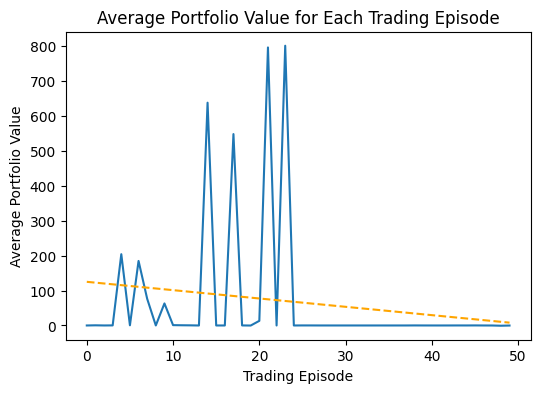

In [8]:
with open('rl/train_output_files/episode_mem.json', 'r') as f:
    data = json.load(f)


def plot_chart(title, trend_line=False):
    # Initialize an empty list to store the averages
    averages = []

    # Iterate over each trading episode
    for episode in range(len(data)):
        # Check if the 'Portfolio Value' array exists for the current episode
        if title in data[episode]:
            # Calculate the average, excluding the first element if it exists
            portfolio_values = data[episode][title]
            if len(portfolio_values) > 1:
                average = np.mean(portfolio_values[:]) #exclude first value in list, because it's always 0
                averages.append(average)
            else:
                # Handle the case where there are no or only one element
                averages.append(np.nan)  # Or any other suitable value to represent missing data
        else:
            # Handle the case where the 'Portfolio Value' array is missing
            averages.append(np.nan)  # Or any other suitable value to represent missing data

    # Plot the averages as a line chart
    plt.figure(figsize=(6, 4))

    plt.plot(range(len(averages)), averages)

    if trend_line:
        m, b = np.polyfit(range(len(averages)), averages, 1)

        # Create new x-values for the trendline
        x_trend = np.linspace(0, len(averages) - 1, 100)

        # Calculate the corresponding y-values for the trendline
        y_trend = m * x_trend + b

        # Plot the trendline
        plt.plot(x_trend, y_trend, color='orange', linestyle='--')


    plt.xlabel('Trading Episode')
    plt.ylabel(f'Average {title}')
    plt.title(f'Average {title} for Each Trading Episode')
    plt.show()

plot_chart('Portfolio Value', trend_line=True)

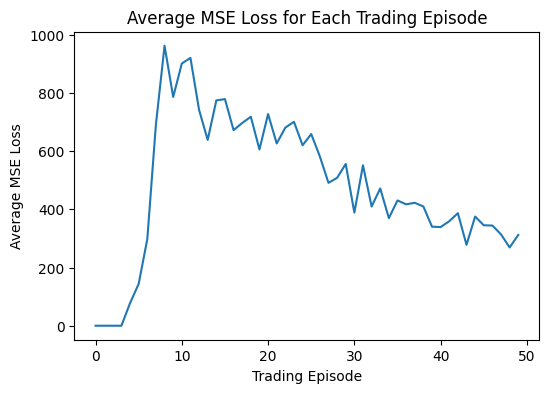

In [9]:
plot_chart('MSE Loss')

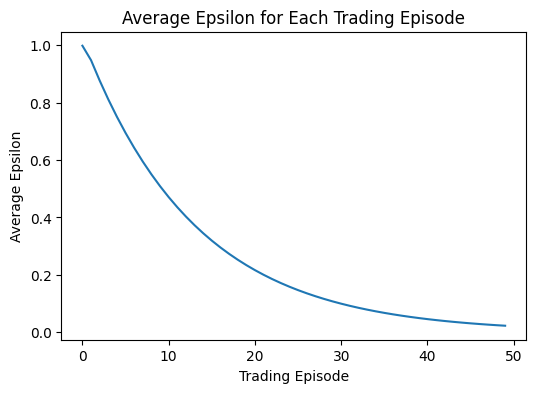

In [10]:
plot_chart('Epsilon')